### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
!pip install -U tensorflow==2.0.0 --quiet

     |████████████████████████████████| 86.3MB 47kB/s 
     |████████████████████████████████| 450kB 43.8MB/s 
     |████████████████████████████████| 3.8MB 49.5MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.2 which is incompatible.


In [1]:
import tensorflow as tf
import keras
tf.set_random_seed(42)

Using TensorFlow backend.


#### Collect Fashion mnist data from tf.keras.datasets 

In [2]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:

trainX.shape

(60000, 28, 28)

In [4]:
testX.shape

(10000, 28, 28)

In [5]:
testY[0]

9

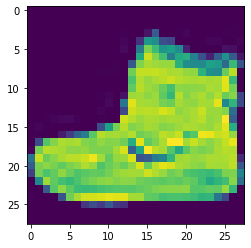

In [6]:
import matplotlib.pyplot as plt
first_array=trainX[0]
plt.imshow(first_array)
plt.show()

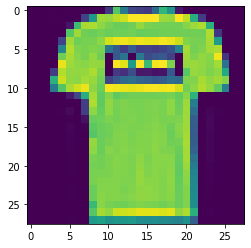

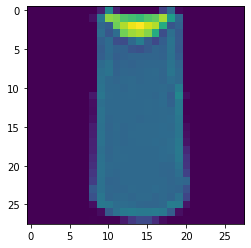

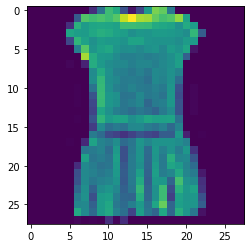

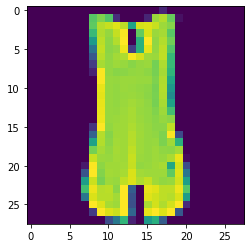

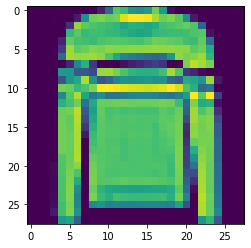

In [7]:

for i in range(1, 6):
    first_array=trainX[i]
    plt.imshow(first_array)
    plt.show()

In [8]:
trainX = trainX.reshape(trainX.shape[0], 28, 28, ).astype('float32')
testX = testX.reshape(testX.shape[0], 28, 28, ).astype('float32')
trainX /= 255
testX /= 255

print('--- THE DATA ---')
print('trainX shape:', trainX.shape)
print(trainX.shape[0], 'train samples')
print(testX.shape[0], 'test samples')

--- THE DATA ---
trainX shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
import pandas as pd

In [10]:
## Checking the numbers of unique classification

pd.DataFrame(trainY).nunique()

0    10
dtype: int64

#### Change train and test labels into one-hot vectors

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

#### Build the Graph

In [12]:
#Clear out model from current memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#### Initialize model, reshape & normalize data

In [0]:
#Clear out model from current memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
# Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.BatchNormalization())
#Dropout layer
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))
model.add(tf.keras.layers.BatchNormalization())
#Dropout layer
model.add(tf.keras.layers.Dropout(0.25))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [0]:
ckpt = tf.keras.callbacks.ModelCheckpoint('mnist_v1.hdf5', save_best_only=True,
                                          monitor='val_loss', mode='min')
tboard = tf.keras.callbacks.TensorBoard(log_dir='./logs/v2')

In [0]:
BATCH_SIZE = 32
EPOCHS = 10

In [20]:
# Train the model
model.fit(trainX, trainY, batch_size=BATCH_SIZE, nb_epoch=EPOCHS,validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.5493 - acc: 0.8055 - val_loss: 0.3932 - val_acc: 0.8562
Epoch 2/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.4288 - acc: 0.8460 - val_loss: 0.3697 - val_acc: 0.8646
Epoch 3/10
60000/60000 [==============================] - 13s 209us/sample - loss: 0.3919 - acc: 0.8569 - val_loss: 0.3553 - val_acc: 0.8662
Epoch 4/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.3684 - acc: 0.8659 - val_loss: 0.3476 - val_acc: 0.8703
Epoch 5/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.3509 - acc: 0.8724 - val_loss: 0.3309 - val_acc: 0.8815
Epoch 6/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.3390 - acc: 0.8754 - val_loss: 0.3321 - val_acc: 0.8789
Epoch 7/10
60000/60000 [==============================] - 13s 209us/sample - loss: 0.3265 - acc: 0.8795 